In [102]:
%run generic.ipynb

In [103]:
from scipy.spatial import Delaunay

def delaunay_graph(kpts):
    points = list(zip(kpts[0], kpts[1]))
    tri = Delaunay(points)
    edges = []

    for simplex in tri.simplices:
        for i in range(len(simplex)):
            for j in range(i + 1, len(simplex)):
                edges.append((simplex[i], simplex[j]))

    return list(set(tuple(sorted(e)) for e in edges))


In [104]:
import math
def knn_graph(kpts, k) -> list[tuple[int, int]]:
    # Initialize the Matrix where we store distances
    distance_matrix: list[list[float]] = []
    # We calculate the distance from each point to another
    points = list(zip(kpts[0], kpts[1]))
    for i, point in enumerate(points):
        # We initialize the array where we will store the distances for each point
        distance_array: list[float] = []
        # IMPORTANT: i and j are point indexes
        for j, other in enumerate(points):
            distance = math.sqrt((point[0]-other[0])**2 + (point[1]-other[1])**2) # Eucleadian distance
            distance_array.append((distance, j))
        distance_array.sort(key=lambda dist: dist[0])
        distance_matrix.append(distance_array.copy())
    
    # Initialize the Result Variable
    edges: list[tuple[int, int]] = []
    # We append the Edges (Each Row's Index ~ Point Index)
    for i, array in enumerate(distance_matrix):
        array = array[1:k+1] # Skip the distance to itself
        for element in array:
            edges.append((i, element[1])) # Build and append the array
                            
    return list(edges)

In [105]:
def plot_image_with_graph(tup):
    img, kpt, edges = tup[0]
    plt.imshow(img)
    plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')
    
    for i, j in edges:
        plt.plot([kpt[0, i], kpt[0, j]], [kpt[1, i], kpt[1, j]], 'r-')
    plt.show()

In [106]:
# The Main Function
def show(cat: Categories, n: int = 4):
    pairs = getting(cat, n) # Gets
    pairs = [resizing(p) for p in pairs] # Resizes
    triplets = [(pair[0], pair[1], knn_graph(pair[1], 2)) for pair in pairs]
    print(triplets[0][1])
    plot_image_with_graph(triplets) # And plots

In [107]:
# The Main Function
def show2(cat: Categories, n: int = 4):
    pairs = getting(cat, n) # Gets
    pairs = [resizing(p) for p in pairs] # Resizes
    triplets = [(pair[0], pair[1], delaunay_graph(pair[1])) for pair in pairs]
    print(triplets[0][1])
    plot_image_with_graph(triplets) # And plots

[[235.77592077 204.86784277 183.27452801 181.15753637 229.42494584
  125.69235531  76.15475085  15.18539152  88.85670071 156.17703497]
 [ 59.57862158  36.75968007  21.78474971 133.02708954 175.09951294
  118.05215918 133.02708954 170.82096141 200.05773021 197.91845445]]


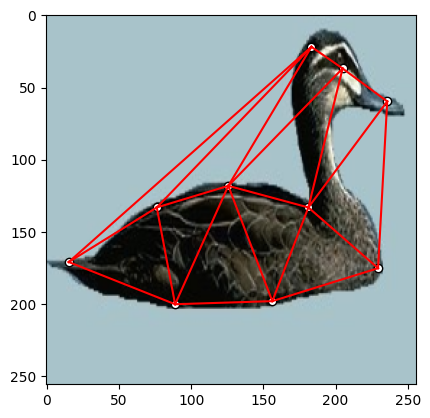

In [108]:
show2(Categories.Duck, 2)